## <span style="color:#2F749F;"><strong>📦 Sesión práctica 3: Análisis Multivariado</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_3_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


In [33]:
import seaborn as snb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [4]:
# Solicitar datos al estudiante
nombre = input("Ingresa tu nombre completo: ")
correo = input("Ingresa tu correo electrónico: ")

# Mostrar los datos ingresados
print("\nResumen de datos ingresados:")
print(f"Nombre: {nombre}")
print(f"Correo electrónico: {correo}")

Ingresa tu nombre completo:  michael
Ingresa tu correo electrónico:  michael



Resumen de datos ingresados:
Nombre: michael
Correo electrónico: michael


## <span style="color:black;"><strong>Parte 3: Análisis Multivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio1: Análisis de componentes principales</strong></span>

A partir de un conjunto de datos real sobre pingüinos antárticos, realiza un análisis multivariado utilizando PCA para reducir la dimensionalidad y visualizar agrupamientos por especie.

1. Carga el conjunto de datos penguins desde la librería seaborn `load_dataset("penguins")`.
2. Selecciona las siguientes variables morfológicas para el análisis:
   - 'bill_length_mm'
   - 'bill_depth_mm'
   - 'flipper_length_mm'
   - 'body_mass_g'
3. Estandariza las variables seleccionadas usando StandardScaler.
4. Aplica PCA()
5. Imprime las ecuaciones que obtuviste para el número de componentes que utilizaste
6. Grafica los resultados en un plano bidimensional (PC1 vs PC2), diferenciando por especie (ver imagen).
7. Interpreta visualmente qué especies se agrupan o separan mejor en el espacio reducido.

<p align="center">
    <img src="imgs\sp_3_e1.png" alt="sp_3_e1" width="600"  height="400">
</p>


In [5]:
dataset = snb.load_dataset('penguins')
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
df = dataset[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


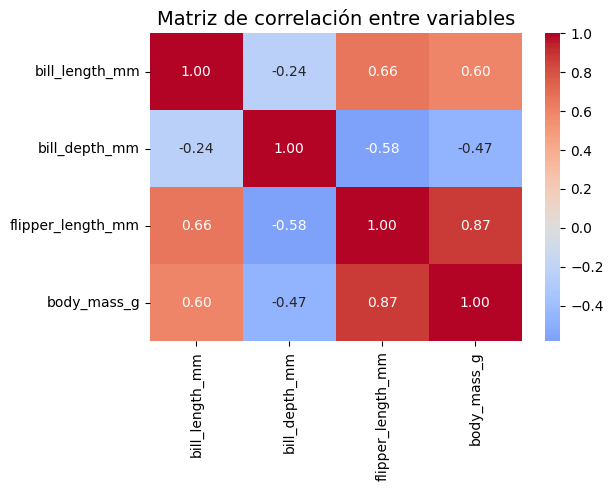

In [16]:
plt.figure(figsize=(6,4))
snb.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de correlación entre variables", fontsize=14)
plt.show()


In [17]:
df = df.dropna()
df.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X= df)
df_scaled.shape

(342, 4)

In [19]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(df_scaled)

In [20]:
componentes = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df.columns
)


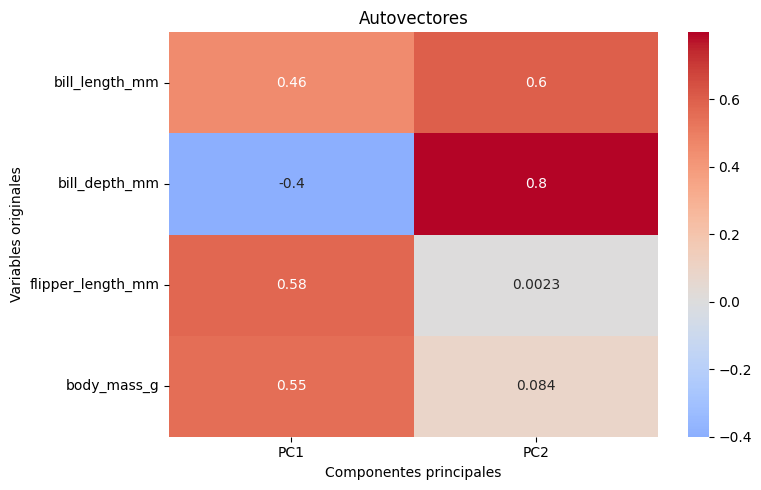

In [21]:
# 📐 Visualización de autovectores
plt.figure(figsize=(8, 5))
snb.heatmap(componentes, annot=True, cmap='coolwarm', center=0)
plt.title('Autovectores')
plt.ylabel('Variables originales')
plt.xlabel('Componentes principales')
plt.tight_layout()
plt.show()

In [22]:
# Ecuaciones de los componentes principales con nombres reales
print("Ecuaciones de los componentes principales:\n")
for i, comp in enumerate(componentes.columns):
    pesos = pca.components_[i]
    ecuacion = " + ".join([f"{round(pesos[j], 3)}·'{df.columns[j]}'" for j in range(len(pesos))])
    print(f"{comp} = {ecuacion}")

Ecuaciones de los componentes principales:

PC1 = 0.455·'bill_length_mm' + -0.4·'bill_depth_mm' + 0.576·'flipper_length_mm' + 0.548·'body_mass_g'
PC2 = 0.597·'bill_length_mm' + 0.798·'bill_depth_mm' + 0.002·'flipper_length_mm' + 0.084·'body_mass_g'


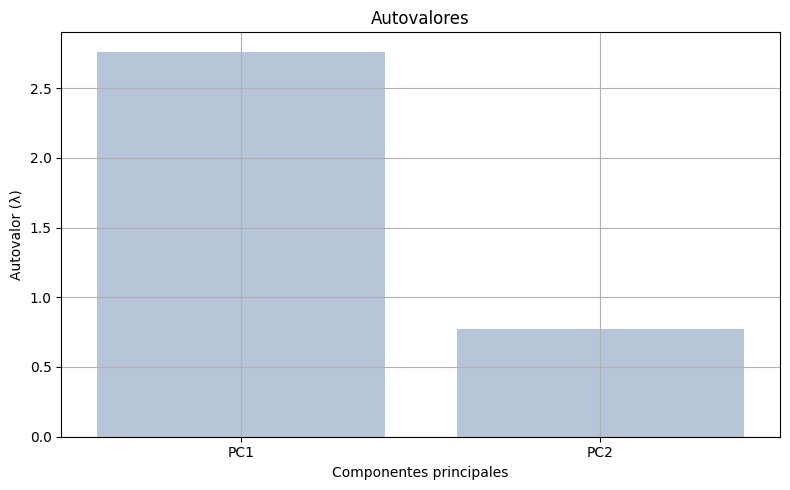

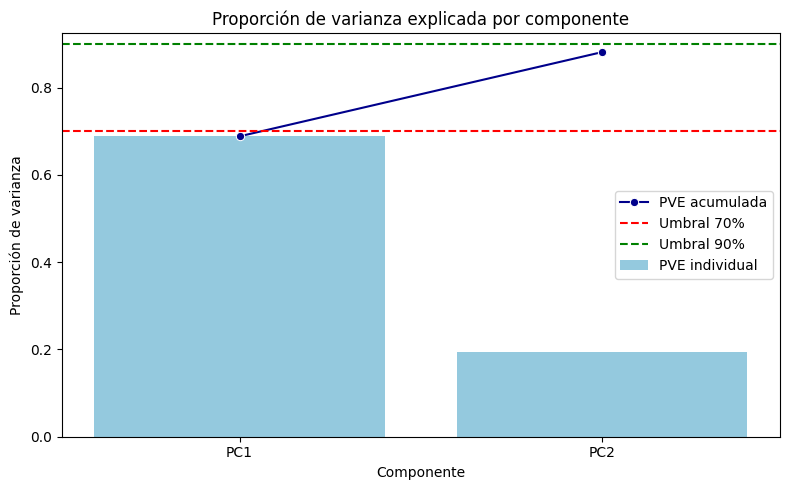

In [23]:
# Varianza explicada
varianza = pca.explained_variance_
PVE = pca.explained_variance_ratio_
PVE_acum = np.cumsum(PVE)
componentes = [f'PC{i+1}' for i in range(len(PVE))]

# DataFrame para visualización
df_varianza = pd.DataFrame({
    'Componente': componentes,
    'Autovalor': varianza,
    'PVE': PVE,
    'PVE acumulada': PVE_acum
})

# Autovalores
plt.figure(figsize=(8, 5))
snb.barplot(x='Componente', y='Autovalor', data=df_varianza, color='lightsteelblue')
plt.title('Autovalores')
plt.ylabel('Autovalor (λ)')
plt.xlabel('Componentes principales')
plt.grid(True)
plt.tight_layout()
plt.show()


# Proporción de varianza explicada
plt.figure(figsize=(8, 5))
snb.barplot(x='Componente', y='PVE', data=df_varianza, color='skyblue', label='PVE individual')
snb.lineplot(x='Componente', y='PVE acumulada', data=df_varianza, marker='o', color='darkblue', label='PVE acumulada')
plt.axhline(0.7, color='red', linestyle='--', label='Umbral 70%')
plt.axhline(0.9, color='green', linestyle='--', label='Umbral 90%')
plt.title('Proporción de varianza explicada por componente')
plt.ylabel('Proporción de varianza')
plt.legend()
plt.tight_layout()
plt.show()

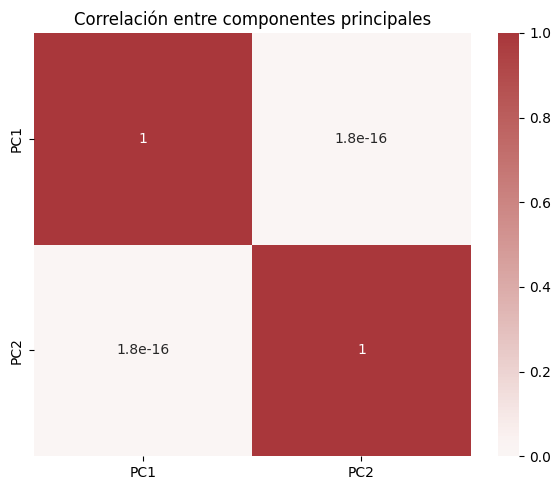

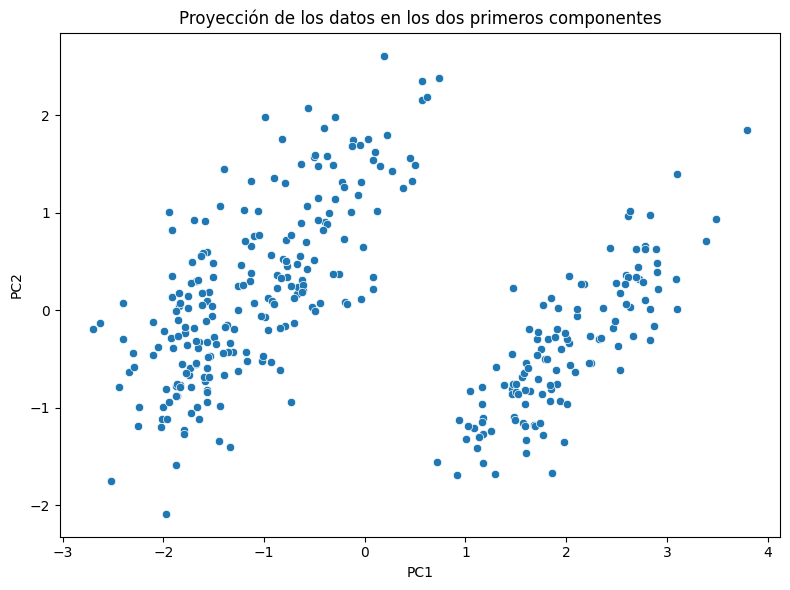

In [25]:
df_pca = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(len(PVE))])
correlaciones = df_pca.corr()

# Visualización
plt.figure(figsize=(6, 5))
snb.heatmap(correlaciones, annot=True, cmap='vlag', center=0)
plt.title('Correlación entre componentes principales')
plt.tight_layout()
plt.show()

df['species'] = dataset['species']

plt.figure(figsize=(8, 6))
snb.scatterplot(data=df_pca, x='PC1', y='PC2')
plt.title('Proyección de los datos en los dos primeros componentes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

### <span style="color:#2F749F;"><strong>Ejercicio 2: Regresión Lineal Múltiple</strong></span>  

A partir de un conjunto de datos real sobre diamantes, realiza un análisis de regresión lineal múltiple para predecir el precio en función de variables numéricas relacionadas con sus características físicas.  

1. Carga el conjunto de datos `diamonds` desde la librería seaborn `load_dataset("diamonds")`.  
2. Selecciona las siguientes variables predictoras para el análisis:  
   - `carat`  
   - `depth`  
   - `table`  
   - `x`  
   - `y`  
   - `z`  
3. Define como variable respuesta el precio (`price`).  
4. Divide los datos en entrenamiento y prueba para validar el modelo.  
5. Ajusta un modelo de **Regresión Lineal Múltiple** usando `statsmodels.OLS()`.  
6. Imprime el resumen del modelo (coeficientes, significancia, R² ajustado, etc.).  
7. Evalúa el desempeño del modelo con métricas de ajuste como **RMSE** y **R²** en el conjunto de prueba.  
8. Grafica los valores reales vs. los valores predichos del precio para interpretar la calidad del ajuste.  

<p align="center">
    <img src="imgs\sp_3_e2.png" alt="sp_3_e2" width="600"  height="400">
</p>



In [26]:
diamonds = snb.load_dataset('diamonds')
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [27]:
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']
print(X.shape , y.shape)

(53940, 6) (53940,)


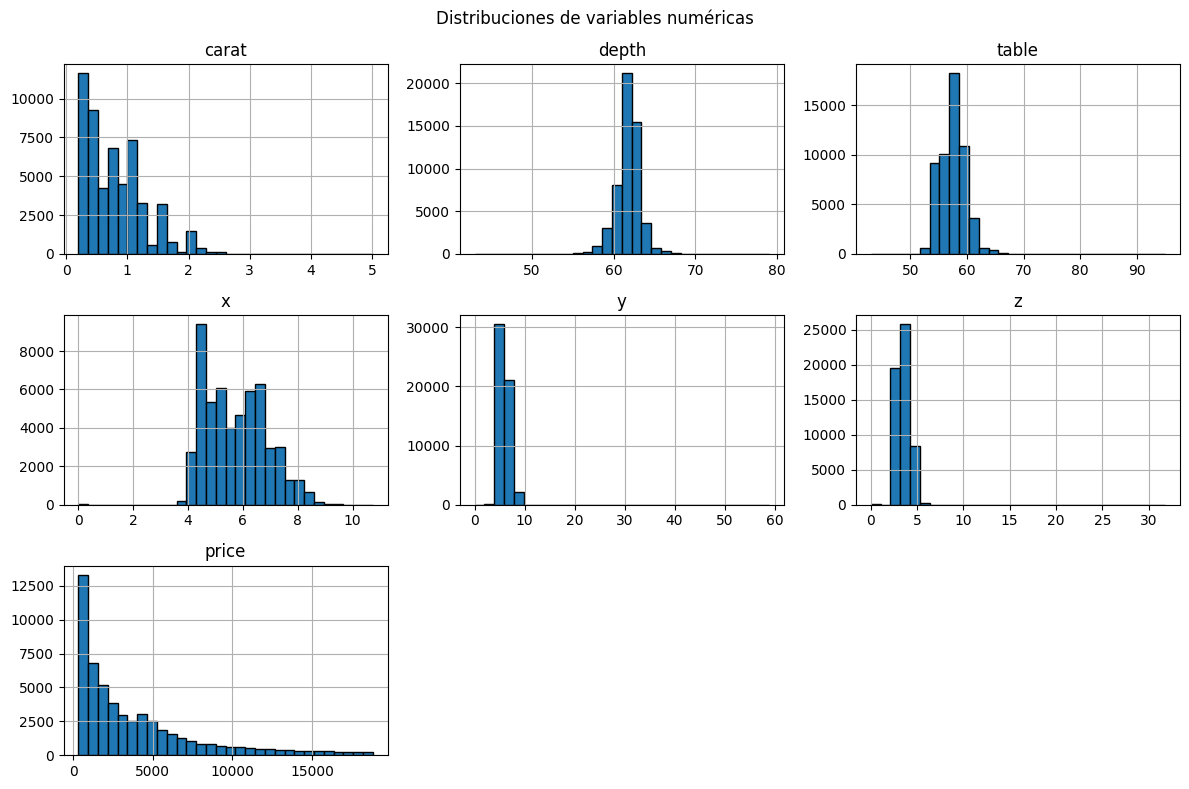

In [28]:
numeric_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

diamonds[numeric_cols].hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Distribuciones de variables numéricas")
plt.tight_layout()
plt.show()

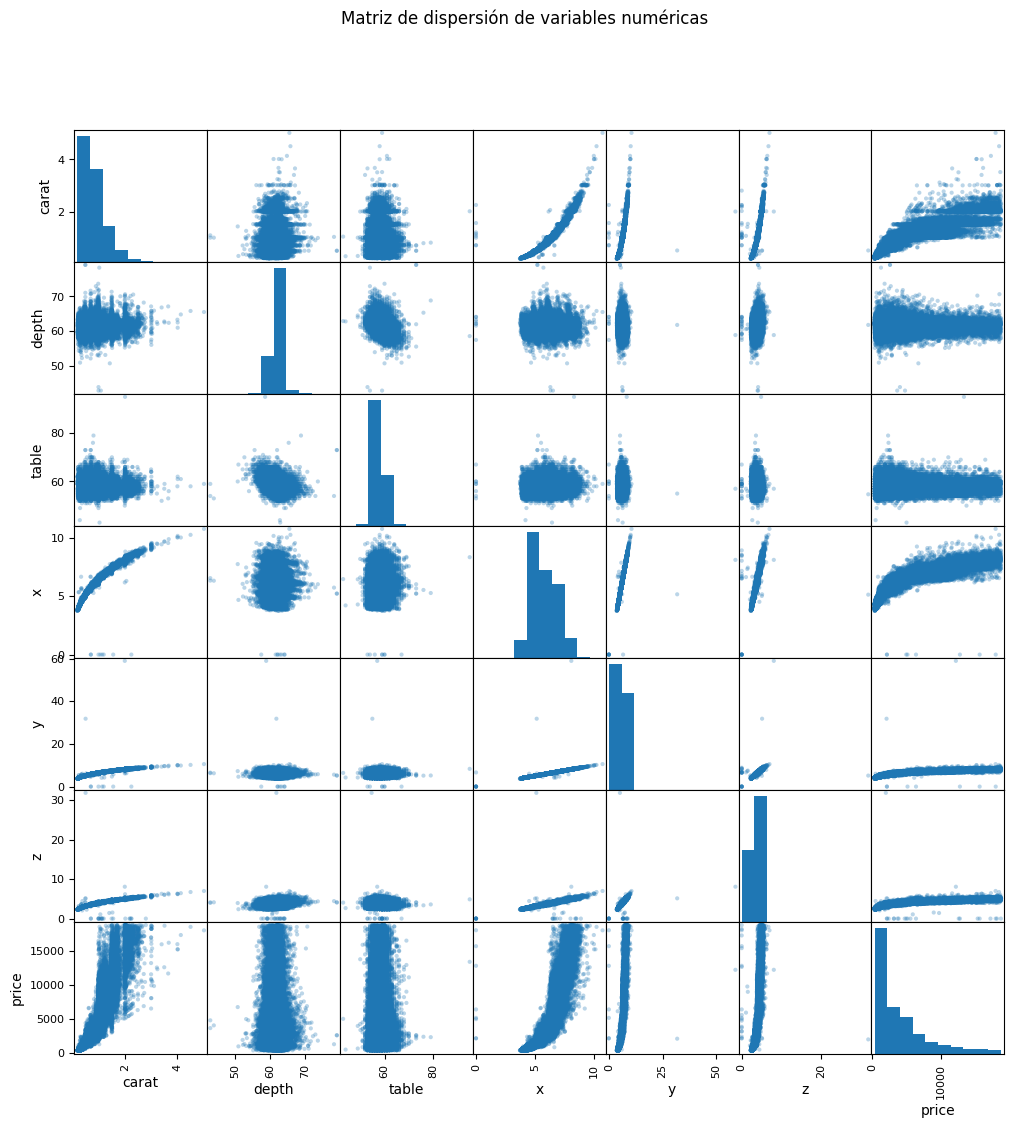

In [29]:
from pandas.plotting import scatter_matrix

scatter_matrix(diamonds[numeric_cols], figsize=(12, 12), alpha=0.3, diagonal="hist")
plt.suptitle("Matriz de dispersión de variables numéricas")
plt.show()


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
X_const =  sm.add_constant(X_train)
X_const_test = sm.add_constant(X_test)
model_lin = sm.OLS(y_train, X_const).fit()

In [32]:
print(model_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 4.391e+04
Date:                Thu, 18 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:14:43   Log-Likelihood:            -3.7672e+05
No. Observations:               43152   AIC:                         7.534e+05
Df Residuals:                   43145   BIC:                         7.535e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.098e+04    497.170     42.192      0.0

In [35]:
y_pred = model_lin.predict(X_const_test)

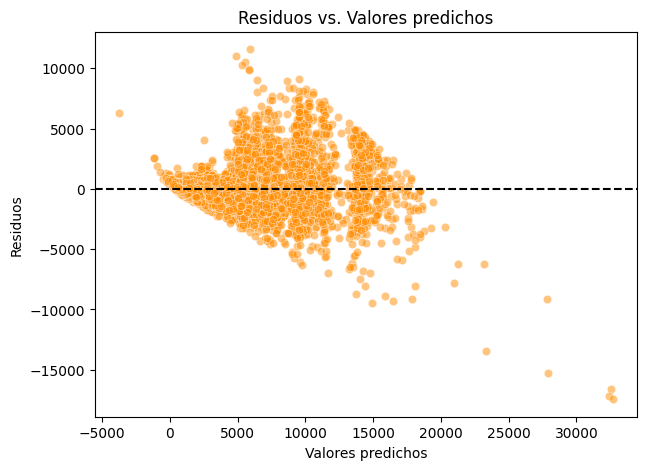

In [36]:
residuos = y_test - y_pred

plt.figure(figsize=(7, 5))
snb.scatterplot(x=y_pred, y=residuos, alpha=0.5, color="darkorange")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs. Valores predichos")
plt.show()


In [37]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R²
r2 = r2_score(y_test, y_pred)

print(f"RMSE en test: {rmse:.2f}")
print(f"R² en test: {r2:.3f}")


RMSE en test: 1497.39
R² en test: 0.859


Durbin-Watson: 1.989 → ¿Cercano a 2?


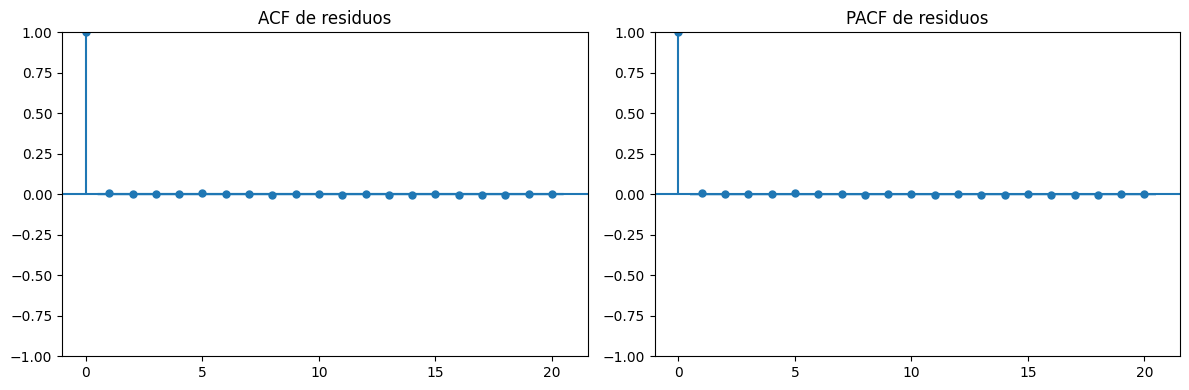

In [51]:
resid = model_lin.resid

# Prueba de Durbin-Watson
dw = durbin_watson(resid)
print(f"Durbin-Watson: {dw:.3f} → ¿Cercano a 2?")

# gráficos de ACF (Autocorrelation Function) y PACF (Partial Autocorrelation Function)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(resid, ax=axes[0], lags=20)
axes[0].set_title("ACF de residuos")
plot_pacf(resid, ax=axes[1], lags=20)
axes[1].set_title("PACF de residuos")
plt.tight_layout()
plt.show()

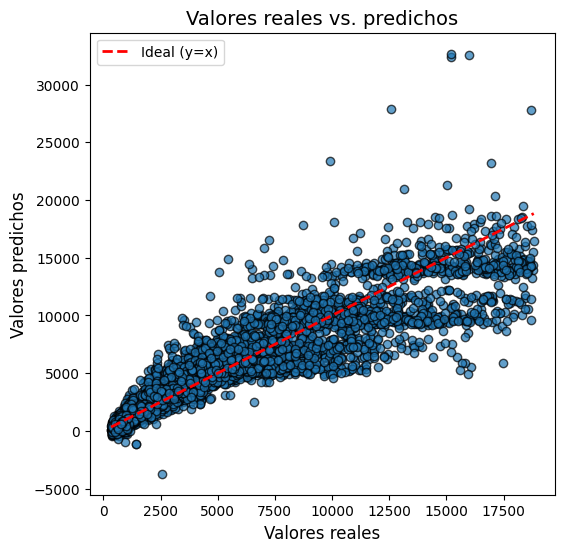

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor="k")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label="Ideal (y=x)")
plt.xlabel("Valores reales", fontsize=12)
plt.ylabel("Valores predichos", fontsize=12)
plt.title("Valores reales vs. predichos", fontsize=14)
plt.legend()
plt.show()

#### En la gráfica se puede visualizar que el modelo logra explicar gran parte de la varianza de los datos, aunque su desempeño se reduce por la cantidad de datos atípicos